# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 0: Load The Data

In [0]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './train.p'
validation_file='./valid.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_test))

print("Number of training examples =", n_train)
print('Number of validation examples =', n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [0]:
# import the csv signnames to a dict
import csv
sign_names = {}
with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    for row in reader:
        num, content = row
        sign_names[num] = content

Text(0.5,1,'41: End of no passing')

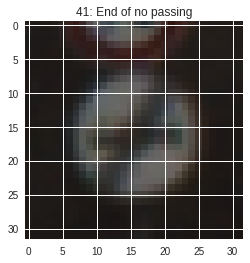

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

choiced_num = 4
label = y_train[choiced_num]
image = X_train[choiced_num]

plt.imshow(image)
plt.title(str(label)+": "+sign_names[str(label)])

In [0]:
# Shuffle the training data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [0]:
# Get 43 samples
image_samples = [] # a list hold the 43 samples
for i in range(n_classes):
    for j in range(n_train):
        if y_train[j] == i:
            image_samples.append(X_train[j])
            break

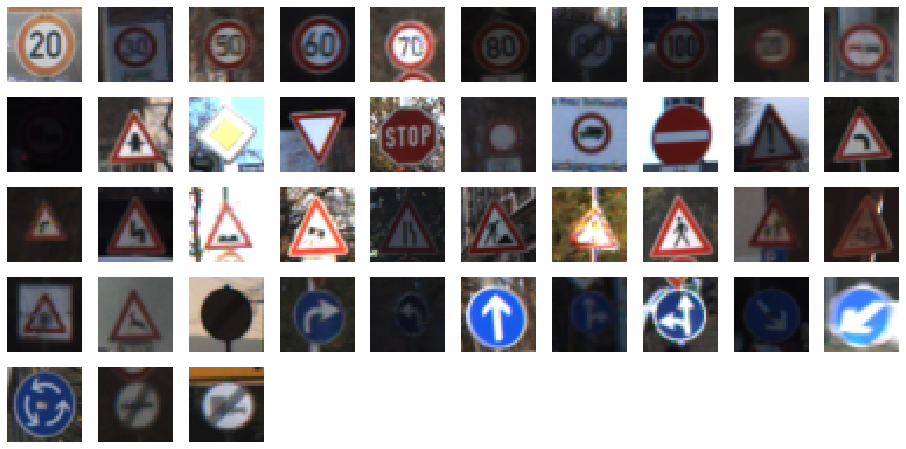

In [8]:
# Show all 43 signs
from matplotlib.gridspec import GridSpec
samples_fig = plt.figure(figsize=(16,8))
rows = 5
cols = 10
count = 0
gs = GridSpec(rows,cols)
for i in range(rows):
    for j in range(cols):
        ax = samples_fig.add_subplot(gs[i,j])
        ax.imshow(image_samples[count])
        ax.set_xticks([])
        ax.set_yticks([])
#         ax.set_title(sign_names[str(count)])
        count += 1
        if count == n_classes:
            break
samples_fig.savefig("sample_fig.jpg")

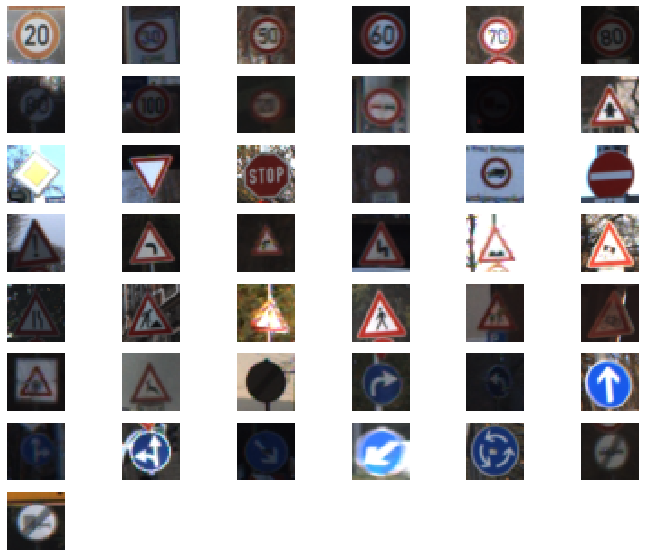

In [9]:
# Show all 43 signs
from matplotlib.gridspec import GridSpec
samples_fig = plt.figure(figsize=(12,10))
rows = 8
cols = 6
count = 0
gs = GridSpec(rows,cols)
for i in range(rows):
    for j in range(cols):
        ax = samples_fig.add_subplot(gs[i,j])
        ax.imshow(image_samples[count])
        ax.set_xticks([])
        ax.set_yticks([])
#         ax.set_title(sign_names[str(count)])
        count += 1
        if count == n_classes:
            break
samples_fig.savefig("sample_fig.jpg")

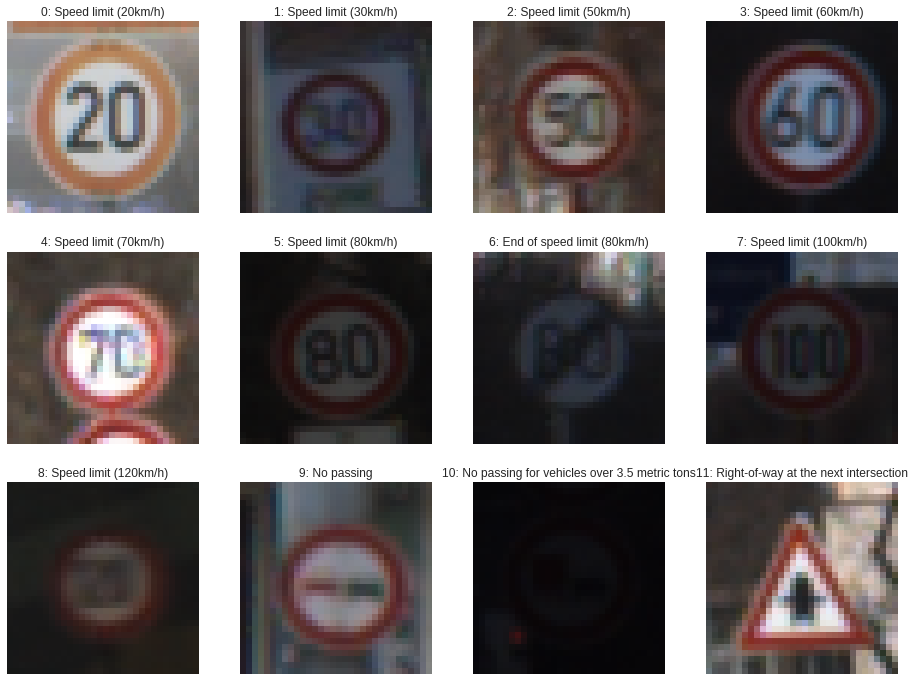

In [16]:
# Show the sign with label (first 16 figure)
from matplotlib.gridspec import GridSpec
samples_fig = plt.figure(figsize=(16,12))
rows = 3
cols = 4
count = 0
gs = GridSpec(rows,cols)
for i in range(rows):
    for j in range(cols):
        ax = samples_fig.add_subplot(gs[i,j])
        ax.imshow(image_samples[count])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(str(count)+": "+sign_names[str(count)])
        count += 1
        if count == n_classes:
            break
samples_fig.savefig('sample_fig_with_label.jpg')

In [0]:
# Get the classes distribution in train data
import numpy as np
classes_num = []
for i in range(n_classes):
    classes_num.append(np.sum(y_train==i))
    

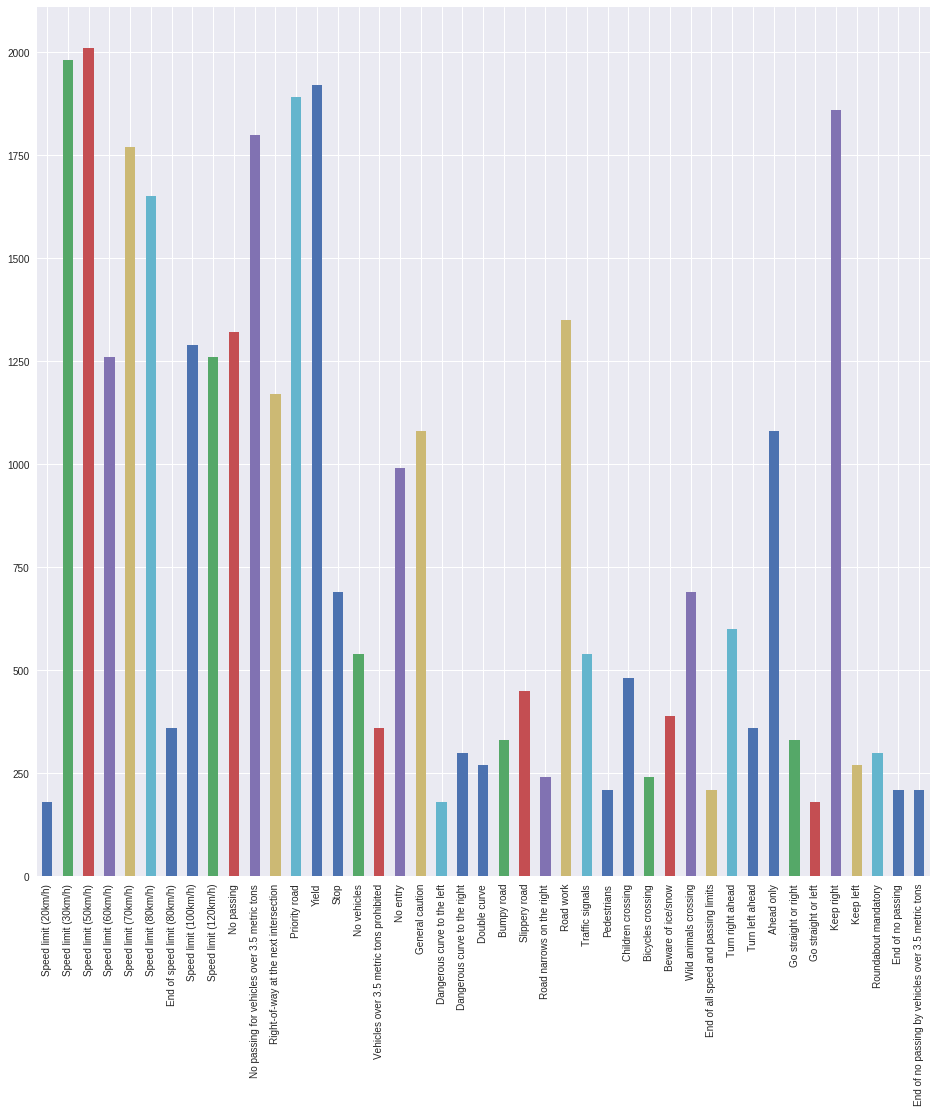

In [13]:
import pandas as pd
classes_text = [sign_names[str(i)] for i in range(n_classes)]
classes_serial = pd.Series(classes_num, index=classes_text)
classes_serial.plot(kind='bar',figsize=(16,16))

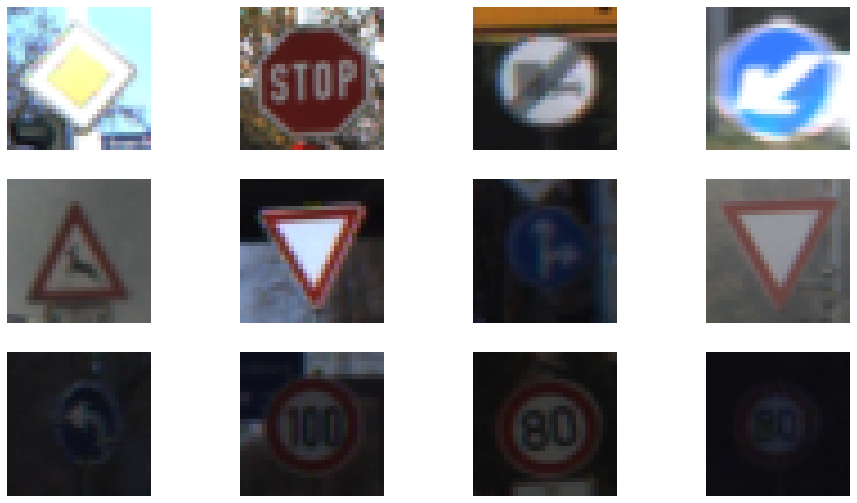

In [53]:
# Show the sign with label (first 16 figure)
from matplotlib.gridspec import GridSpec
images_sample = X_train[:12].copy() # get 12 pictures
samples_fig = plt.figure(figsize=(16,9))
rows = 3
cols = 4
count = 0
gs = GridSpec(rows,cols)
for i in range(rows):
    for j in range(cols):
        ax = samples_fig.add_subplot(gs[i,j])
        ax.imshow(images_sample[count])
        ax.set_xticks([])
        ax.set_yticks([])
        count += 1

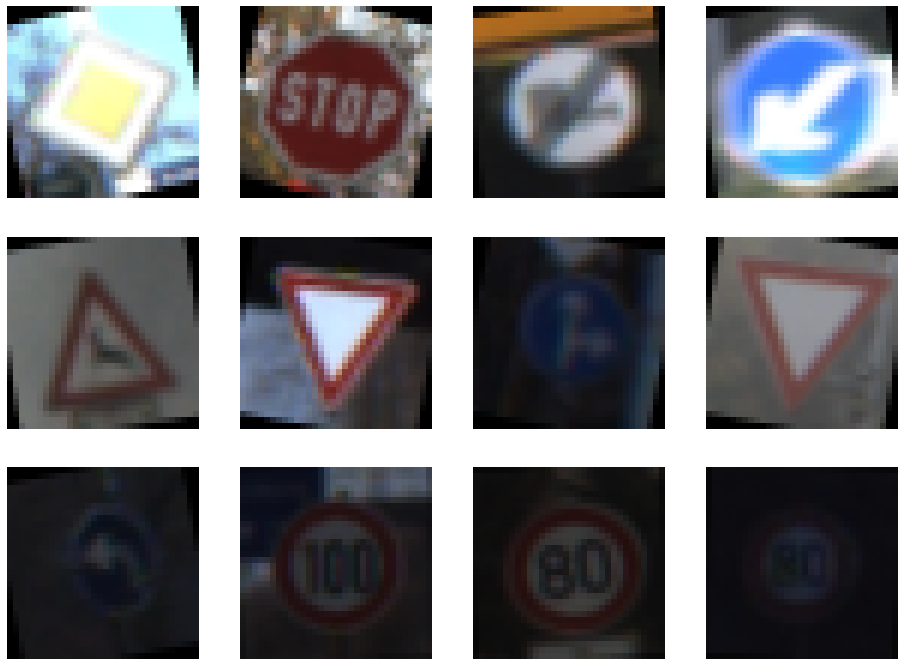

In [54]:
# rotate the image
import cv2

center = (32/2, 32/2)
scale = 1.0 # no change on image scale

rotated_images = np.zeros_like(images_sample)

for i in range(12):
  angle = np.random.randint(-15, 15)
  M = cv2.getRotationMatrix2D(center, angle, scale)
  rotated_images[i] = cv2.warpAffine(images_sample[i], M, (32, 32))
  
samples_fig = plt.figure(figsize=(16,12))
rows = 3
cols = 4
count = 0
gs = GridSpec(rows,cols)
for i in range(rows):
    for j in range(cols):
        ax = samples_fig.add_subplot(gs[i,j])
        ax.imshow(rotated_images[count])
        ax.set_xticks([])
        ax.set_yticks([])
        count += 1


In [0]:
# roated the X_train
# rotate the image
import cv2

center = (32/2, 32/2)
scale = 1.0 # no change on image scale

rotated_X_train = np.zeros_like(X_train)

for i in range(len(X_train)):
  angle = np.random.randint(-15, 15)
  M = cv2.getRotationMatrix2D(center, angle, scale)
  rotated_X_train[i] = cv2.warpAffine(X_train[i], M, (32, 32))


In [0]:
rotated_X_train_2 = np.zeros_like(X_train)

for i in range(len(X_train)):
  angle = np.random.randint(-15, 15)
  M = cv2.getRotationMatrix2D(center, angle, scale)
  rotated_X_train_2[i] = cv2.warpAffine(X_train[i], M, (32, 32))

In [0]:
rotated_X_train_3 = np.zeros_like(X_train)

for i in range(len(X_train)):
  angle = np.random.randint(-15, 15)
  M = cv2.getRotationMatrix2D(center, angle, scale)
  rotated_X_train_3[i] = cv2.warpAffine(X_train[i], M, (32, 32))

In [0]:
rotated_X_train_4 = np.zeros_like(X_train)

for i in range(len(X_train)):
  angle = np.random.randint(-15, 15)
  M = cv2.getRotationMatrix2D(center, angle, scale)
  rotated_X_train_4[i] = cv2.warpAffine(X_train[i], M, (32, 32))

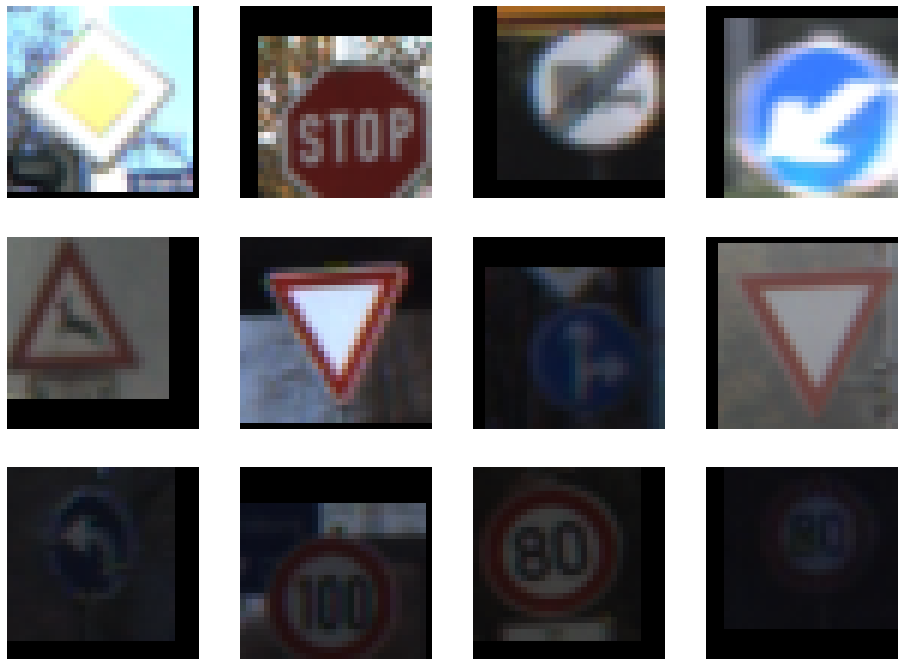

In [59]:
# translation the image
import cv2

translation_images = np.zeros_like(images_sample)

for i in range(12):
  offset_x = np.random.randint(-6, 7)
  offset_y = np.random.randint(-6, 7)
  M = np.float32([[1,0,offset_x], [0,1,offset_y]])
  translation_images[i] = cv2.warpAffine(images_sample[i], M, (32, 32))
  
samples_fig = plt.figure(figsize=(16,12))
rows = 3
cols = 4
count = 0
gs = GridSpec(rows,cols)
for i in range(rows):
    for j in range(cols):
        ax = samples_fig.add_subplot(gs[i,j])
        ax.imshow(translation_images[count])
        ax.set_xticks([])
        ax.set_yticks([])
        count += 1



In [0]:
# translation the image
import cv2

translation_X_train = np.zeros_like(X_train)

for i in range(len(X_train)):
  offset_x = np.random.randint(-3, 4)
  offset_y = np.random.randint(-3, 4)
  M = np.float32([[1,0,offset_x], [0,1,offset_y]])
  translation_X_train[i] = cv2.warpAffine(X_train[i], M, (32, 32))

In [0]:
# translation the image
import cv2

translation_X_train_2 = np.zeros_like(X_train)

for i in range(len(X_train)):
  offset_x = np.random.randint(-3, 4)
  offset_y = np.random.randint(-3, 4)
  M = np.float32([[1,0,offset_x], [0,1,offset_y]])
  translation_X_train_2[i] = cv2.warpAffine(X_train[i], M, (32, 32))

In [0]:
# translation the image
import cv2

translation_X_train_3 = np.zeros_like(X_train)

for i in range(len(X_train)):
  offset_x = np.random.randint(-3, 4)
  offset_y = np.random.randint(-3, 4)
  M = np.float32([[1,0,offset_x], [0,1,offset_y]])
  translation_X_train_3[i] = cv2.warpAffine(X_train[i], M, (32, 32))

In [0]:
# # translation the image + rotate
# import cv2

# translation_rotate_X_train = np.zeros_like(X_train)

# for i in range(len(X_train)):
#   offset_x = np.random.randint(-3, 4)
#   offset_y = np.random.randint(-3, 4)
#   M = np.float32([[1,0,offset_x], [0,1,offset_y]])
#   translation_X_train = cv2.warpAffine(X_train[i], M, (32, 32))
  
#   angle = np.random.randint(-10, 10)
#   M = cv2.getRotationMatrix2D(center, angle, scale)
#   translation_rotate_X_train[i] = cv2.warpAffine(translation_X_train, M, (32, 32))
  
  

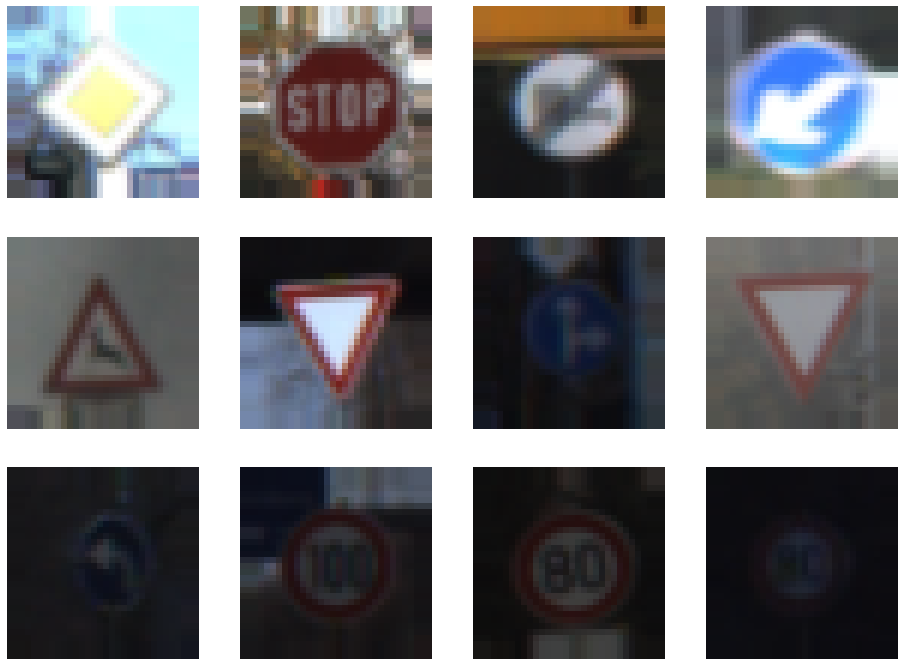

In [64]:
# resize the image 0.9
import cv2

# resized_images_90 = np.zeros((12,32,32,3), dtype=np.uint8)
resized_images_90 = np.zeros_like(images_sample)

for i in range(12):
  resized_image_90 = cv2.resize(images_sample[i], (28, 28))
  resized_images_90[i] = cv2.copyMakeBorder(resized_image_90, 2,2,2,2, cv2.BORDER_REPLICATE)
  
samples_fig = plt.figure(figsize=(16,12))
rows = 3
cols = 4
count = 0
gs = GridSpec(rows,cols)
for i in range(rows):
    for j in range(cols):
        ax = samples_fig.add_subplot(gs[i,j])
        ax.imshow(resized_images_90[count])
        ax.set_xticks([])
        ax.set_yticks([])
        count += 1

In [0]:
# resize the image 0.9
import cv2

resized_X_train_90 = np.zeros_like(X_train)

for i in range(len(X_train)):
  resized_image_90 = cv2.resize(X_train[i], (28, 28))
  resized_X_train_90[i] = cv2.copyMakeBorder(resized_image_90, 2,2,2,2, cv2.BORDER_REPLICATE)

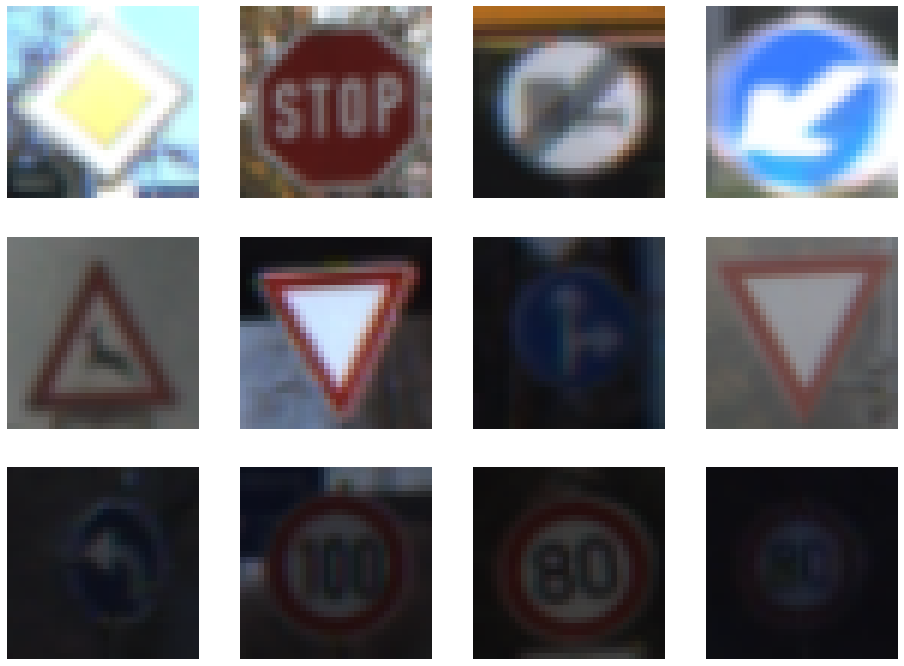

In [77]:
# resize the image 1.1
import cv2

# resized_images_110 = np.zeros((12,36,36,3), dtype=np.uint8)
resized_images_110 = np.zeros_like(images_sample)

for i in range(12):
#   resized_images_110[i] = cv2.resize(images_sample[i], (36, 36))
  resized_image_110 = cv2.resize(images_sample[i], (36, 36))
  resized_images_110[i] = resized_image_110[2:34,2:34,:]
  
samples_fig = plt.figure(figsize=(16,12))
rows = 3
cols = 4
count = 0
gs = GridSpec(rows,cols)
for i in range(rows):
    for j in range(cols):
        ax = samples_fig.add_subplot(gs[i,j])
        ax.imshow(resized_images_110[count])
        ax.set_xticks([])
        ax.set_yticks([])
        count += 1

In [0]:
# resize the image 1.1
import cv2

resized_X_train_110 = np.zeros_like(X_train)

for i in range(len(X_train)):
  resized_image_110 = cv2.resize(X_train[i], (36, 36))
  resized_X_train_110[i] = resized_image_110[2:34,2:34,:]

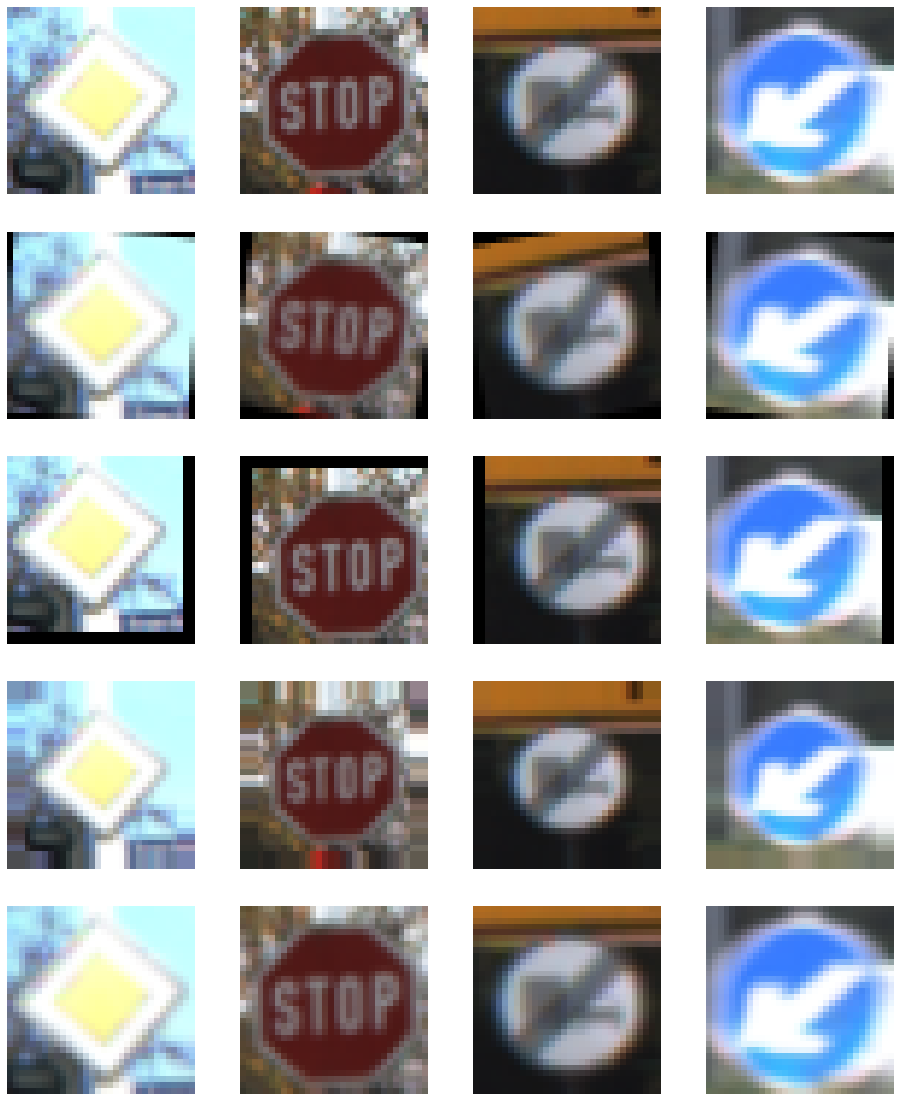

In [87]:
# show the data generated
samples_fig = plt.figure(figsize=(16,20))
rows = 5
cols = 4
count = 0
gs = GridSpec(rows,cols)
for i in range(rows):
    for j in range(cols):
        ax = samples_fig.add_subplot(gs[i,j])
        if i == 0:
          ax.imshow(X_train[j])
        if i == 1:
          ax.imshow(rotated_X_train[j])
        if i == 2:
          ax.imshow(translation_X_train[j])
        if i == 3:
          ax.imshow(resized_X_train_90[j])
        if i == 4:
          ax.imshow(resized_X_train_110[j])
        ax.set_xticks([])
        ax.set_yticks([])
        count += 1

In [0]:
# Combint the faked data together
X_train_faked = np.zeros((n_train*5, 32, 32, 3), dtype=np.uint8)
y_train_faked = np.zeros(n_train*5, dtype=np.uint8)

X_train_faked[:n_train] = X_train
X_train_faked[n_train:n_train*2] = rotated_X_train
X_train_faked[n_train*2:n_train*3] = translation_X_train
X_train_faked[n_train*3:n_train*4] = resized_X_train_90
X_train_faked[n_train*4:] = resized_X_train_110

y_train_faked[:n_train] = y_train
y_train_faked[n_train:n_train*2] = y_train
y_train_faked[n_train*2:n_train*3] = y_train
y_train_faked[n_train*3:n_train*4] = y_train
y_train_faked[n_train*4:] = y_train

In [0]:
# Combint the faked data together 10x
X_train_faked_10x = np.zeros((n_train*10, 32, 32, 3), dtype=np.uint8)
y_train_faked_10x = np.zeros(n_train*10, dtype=np.uint8)

X_train_faked_10x[:n_train] = X_train
X_train_faked_10x[n_train:n_train*2] = rotated_X_train
X_train_faked_10x[n_train*2:n_train*3] = translation_X_train
X_train_faked_10x[n_train*3:n_train*4] = resized_X_train_90
X_train_faked_10x[n_train*4:n_train*5] = resized_X_train_110
X_train_faked_10x[n_train*5:n_train*6] = rotated_X_train_2
X_train_faked_10x[n_train*6:n_train*7] = rotated_X_train_3
X_train_faked_10x[n_train*7:n_train*8] = rotated_X_train_4
X_train_faked_10x[n_train*8:n_train*9] = translation_X_train_2
X_train_faked_10x[n_train*9:] = translation_X_train_3

y_train_faked_10x[:n_train] = y_train
y_train_faked_10x[n_train:n_train*2] = y_train
y_train_faked_10x[n_train*2:n_train*3] = y_train
y_train_faked_10x[n_train*3:n_train*4] = y_train
y_train_faked_10x[n_train*4:n_train*5] = y_train
y_train_faked_10x[n_train*5:n_train*6] = y_train
y_train_faked_10x[n_train*6:n_train*7] = y_train
y_train_faked_10x[n_train*7:n_train*8] = y_train
y_train_faked_10x[n_train*8:n_train*9] = y_train
y_train_faked_10x[n_train*9:] = y_train

In [0]:
# # Combint the faked data together 8x
# X_train_faked_8x = np.zeros((n_train*8, 32, 32, 3), dtype=np.uint8)
# y_train_faked_8x = np.zeros(n_train*8, dtype=np.uint8)

# X_train_faked_8x[:n_train] = X_train
# X_train_faked_8x[n_train:n_train*2] = rotated_X_train
# X_train_faked_8x[n_train*2:n_train*3] = translation_X_train
# X_train_faked_8x[n_train*3:n_train*4] = resized_X_train_90
# X_train_faked_8x[n_train*4:n_train*5] = resized_X_train_110
# X_train_faked_8x[n_train*5:n_train*6] = translation_rotate_X_train
# X_train_faked_8x[n_train*6:n_train*7] = resized_X_train_90_rotate
# X_train_faked_8x[n_train*7:] = resized_X_train_110_rotate

# y_train_faked_8x[:n_train] = y_train
# y_train_faked_8x[n_train:n_train*2] = y_train
# y_train_faked_8x[n_train*2:n_train*3] = y_train
# y_train_faked_8x[n_train*3:n_train*4] = y_train
# y_train_faked_8x[n_train*4:n_train*5] = y_train
# y_train_faked_8x[n_train*5:n_train*6] = y_train
# y_train_faked_8x[n_train*6:n_train*7] = y_train
# y_train_faked_8x[n_train*7:] = y_train

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [0]:
with tf.Session() as sess:
  color_images = tf.placeholder(tf.float32, [None, 32,32,3])
  gray_images = tf.image.rgb_to_grayscale(color_images)
  
  grayscale_image = sess.run(gray_images, feed_dict={color_images: X_train[:4]})

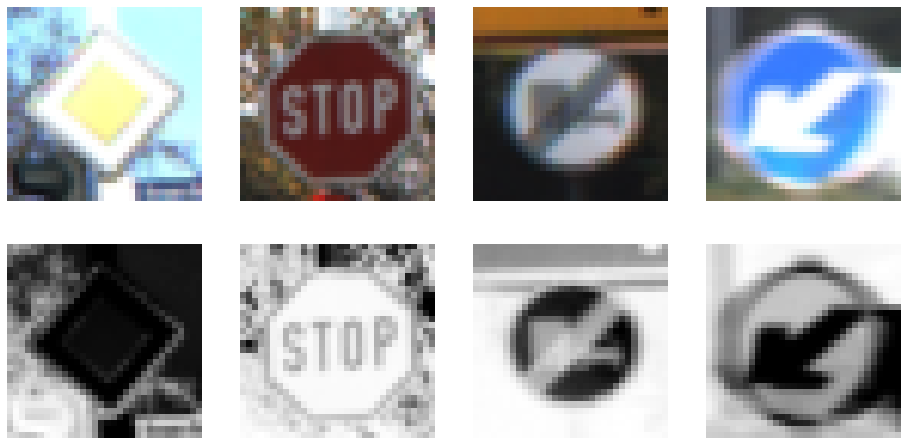

In [110]:
samples_fig = plt.figure(figsize=(16,8))
rows = 2
cols = 4
count = 0
gs = GridSpec(rows,cols)
for i in range(rows):
    for j in range(cols):
        ax = samples_fig.add_subplot(gs[i,j])
        if i == 0:
          ax.imshow(X_train[j])
        if i == 1:
          ax.imshow(grayscale_image[j].reshape((32,32)))
#         if i == 2:
#           ax.imshow(translation_X_train[j])
#         if i == 3:
#           ax.imshow(resized_X_train_90[j])
#         if i == 4:
#           ax.imshow(resized_X_train_110[j])
        ax.set_xticks([])
        ax.set_yticks([])
        count += 1

### Model Architecture

In [0]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
x = tf.placeholder(tf.float32, (None, 32, 32, 3), 'X_holder')
y = tf.placeholder(tf.int32, (None), 'y_holder')
one_hot_y = tf.one_hot(y, 43)

from tensorflow.contrib.layers import flatten
keep_prob_conv = tf.placeholder(tf.float32, name='keep_prob_conv')
keep_prob_fc = tf.placeholder(tf.float32, name='keep_prob_conv')


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [0]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

from helper import LeNet, LeNet_4x, LeNet_4x_MS, network

rate = 0.001


# logits = LeNet(x, keep_prob_conv, keep_prob_fc)
logits = LeNet_4x(x, keep_prob_conv, keep_prob_fc)
# logits = network(x, keep_prob_conv, keep_prob_fc)


softmax_prob = tf.nn.softmax(logits)
top_k = tf.math.top_k(softmax_prob, k=5)

In [0]:
reg_losses = tf.losses.get_regularization_loss()
reg_constant = tf.placeholder(tf.float32, name='reg_constant_holder')

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.add(tf.reduce_mean(cross_entropy), reg_losses*reg_constant)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, BATCH_SIZE):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob_conv: 1.0, keep_prob_fc: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [0]:
def train(X_train,y_train,X_valid,y_valid,X_test,y_test, 
          reg_constant_input=0, keep_prob_conv_input=1.0, keep_prob_fc_input=1.0, epoches=10, batch_size=128): 
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)

        print("Training...")
        for i in range(epoches):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, batch_size):
                end = offset + batch_size
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, 
                                                        reg_constant: reg_constant_input,
                                                        keep_prob_conv: keep_prob_conv_input, keep_prob_fc: keep_prob_fc_input})

            train_accuracy = evaluate(X_train, y_train, batch_size)
            validation_accuracy = evaluate(X_valid, y_valid, batch_size)
            test_accuracy = evaluate(X_test, y_test, batch_size)
            print("EPOCH {} ...".format(i+1))
            print("Train Accuracy = {:.3f} Validation Accuracy = {:.3f} Test Accuracy = {:.3f}"\
                  .format(train_accuracy,validation_accuracy,test_accuracy))
        
        saver.save(sess, './lenet')
        print("Model saved")

In [0]:
def get_errors(X_data, y_data):
  error_list = [0 for i in range(n_classes)]
  
  with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    predict = sess.run(correct_prediction, feed_dict={x: X_data, y: y_data, keep_prob_conv: 1.0, keep_prob_fc: 1.0})
    
    for i in range(len(y_data)):
      if predict[i] == False:
        error_list[y_data[i]] += 1
  return error_list    

In [0]:
# LeNet(X), reg = 0, conv_drop = 1.0, fc_drop = 1.0
import time
import datetime
time1 = time.time()

train(X_train,y_train,X_valid,y_valid,X_test,y_test, 0, 1.0, 1.0)

time2 = time.time()
running_time = (time2-time1)/60
print("used time : {:.2f} minutes".format(running_time))
now = datetime.datetime.now()
print(now)

In [0]:
# LeNet(X), reg = 0.01, conv_drop = 1.0, fc_drop = 0.5
import time
import datetime
time1 = time.time()

train(X_train,y_train,X_valid,y_valid,X_test,y_test, 0.01, 1.0, 0.5)

time2 = time.time()
running_time = (time2-time1)/60
print("used time : {:.2f} minutes".format(running_time))
now = datetime.datetime.now()
print(now)

In [0]:
# LeNet(X), reg = 0, conv_drop = 1.0, fc_drop = 1.0, 5x data
import time
import datetime
time1 = time.time()

train(X_train_faked,y_train_faked,X_valid,y_valid,X_test,y_test, 0, 1.0, 1.0)

time2 = time.time()
running_time = (time2-time1)/60
print("used time : {:.2f} minutes".format(running_time))
now = datetime.datetime.now()
print(now)

In [0]:
# LeNet(X), reg = 0.01, conv_drop = 1.0, fc_drop = 0.5, 5x data
import time
import datetime
time1 = time.time()

train(X_train_faked,y_train_faked,X_valid,y_valid,X_test,y_test, 0.01, 1.0, 0.5)

time2 = time.time()
running_time = (time2-time1)/60
print("used time : {:.2f} minutes".format(running_time))
now = datetime.datetime.now()
print(now)

In [0]:
# LeNet(X), reg = 0, conv_drop = 1.0, fc_drop = 1.0, 10x data
import time
import datetime
time1 = time.time()

train(X_train_faked_10x,y_train_faked_10x,X_valid,y_valid,X_test,y_test, 0, 1.0, 1.0)

time2 = time.time()
running_time = (time2-time1)/60
print("used time : {:.2f} minutes".format(running_time))
now = datetime.datetime.now()
print(now)

In [153]:
# LeNet_4x(X), reg = 0.01, conv_drop = 1.0, fc_drop = 0.5
import datetime
time1 = time.time()

train(X_train,y_train,X_valid,y_valid,X_test,y_test, 0.01, 1.0, 0.5)

time2 = time.time()
running_time = (time2-time1)/60
print("used time : {:.2f} minutes".format(running_time))
now = datetime.datetime.now()
print(now)

Training...
EPOCH 1 ...
Train Accuracy = 0.921 Validation Accuracy = 0.867 Test Accuracy = 0.846
EPOCH 2 ...
Train Accuracy = 0.976 Validation Accuracy = 0.927 Test Accuracy = 0.913
EPOCH 3 ...
Train Accuracy = 0.992 Validation Accuracy = 0.947 Test Accuracy = 0.927
EPOCH 4 ...
Train Accuracy = 0.995 Validation Accuracy = 0.958 Test Accuracy = 0.931
EPOCH 5 ...
Train Accuracy = 0.998 Validation Accuracy = 0.965 Test Accuracy = 0.942
EPOCH 6 ...
Train Accuracy = 0.998 Validation Accuracy = 0.963 Test Accuracy = 0.944
EPOCH 7 ...
Train Accuracy = 0.999 Validation Accuracy = 0.969 Test Accuracy = 0.947
EPOCH 8 ...
Train Accuracy = 0.999 Validation Accuracy = 0.973 Test Accuracy = 0.945
EPOCH 9 ...
Train Accuracy = 0.999 Validation Accuracy = 0.971 Test Accuracy = 0.944
EPOCH 10 ...
Train Accuracy = 0.999 Validation Accuracy = 0.969 Test Accuracy = 0.946
Model saved
used time : 8.55 minutes
2018-11-16 08:56:24.410845


In [73]:
# LeNet_4x(X), reg = 0.01, conv_drop = 1.0, fc_drop = 0.5
import datetime
time1 = time.time()

train(X_train,y_train,X_valid,y_valid,X_test,y_test, 0.01, 1.0, 0.5)

time2 = time.time()
running_time = (time2-time1)/60
print("used time : {:.2f} minutes".format(running_time))
now = datetime.datetime.now()
print(now)

Training...
EPOCH 1 ...
Train Accuracy = 0.928 Validation Accuracy = 0.857 Test Accuracy = 0.851
EPOCH 2 ...
Train Accuracy = 0.982 Validation Accuracy = 0.939 Test Accuracy = 0.923
EPOCH 3 ...
Train Accuracy = 0.993 Validation Accuracy = 0.954 Test Accuracy = 0.937
EPOCH 4 ...
Train Accuracy = 0.995 Validation Accuracy = 0.963 Test Accuracy = 0.939
EPOCH 5 ...
Train Accuracy = 0.997 Validation Accuracy = 0.963 Test Accuracy = 0.946
EPOCH 6 ...
Train Accuracy = 0.998 Validation Accuracy = 0.959 Test Accuracy = 0.942
EPOCH 7 ...
Train Accuracy = 0.999 Validation Accuracy = 0.969 Test Accuracy = 0.949
EPOCH 8 ...
Train Accuracy = 0.998 Validation Accuracy = 0.970 Test Accuracy = 0.944
EPOCH 9 ...
Train Accuracy = 0.997 Validation Accuracy = 0.968 Test Accuracy = 0.945
EPOCH 10 ...
Train Accuracy = 0.999 Validation Accuracy = 0.970 Test Accuracy = 0.943
Model saved
used time : 8.47 minutes
2018-11-16 02:39:50.646579


In [69]:
# LeNet_4x(X), reg = 0, conv_drop = 0.5, fc_drop = 0.5
import datetime
time1 = time.time()

train(X_train,y_train,X_valid,y_valid,X_test,y_test, 0, 0.5, 0.5)

time2 = time.time()
running_time = (time2-time1)/60
print("used time : {:.2f} minutes".format(running_time))
now = datetime.datetime.now()
print(now)

Training...
EPOCH 1 ...
Train Accuracy = 0.519 Validation Accuracy = 0.478 Test Accuracy = 0.484
EPOCH 2 ...
Train Accuracy = 0.829 Validation Accuracy = 0.782 Test Accuracy = 0.760
EPOCH 3 ...
Train Accuracy = 0.914 Validation Accuracy = 0.848 Test Accuracy = 0.839
EPOCH 4 ...
Train Accuracy = 0.957 Validation Accuracy = 0.905 Test Accuracy = 0.898
EPOCH 5 ...
Train Accuracy = 0.974 Validation Accuracy = 0.920 Test Accuracy = 0.914
EPOCH 6 ...
Train Accuracy = 0.979 Validation Accuracy = 0.927 Test Accuracy = 0.926
EPOCH 7 ...
Train Accuracy = 0.985 Validation Accuracy = 0.934 Test Accuracy = 0.928
EPOCH 8 ...
Train Accuracy = 0.984 Validation Accuracy = 0.938 Test Accuracy = 0.925
EPOCH 9 ...
Train Accuracy = 0.992 Validation Accuracy = 0.949 Test Accuracy = 0.943
EPOCH 10 ...
Train Accuracy = 0.994 Validation Accuracy = 0.954 Test Accuracy = 0.942
Model saved
used time : 9.53 minutes
2018-11-15 14:29:22.355288


In [99]:
# LeNet_4x(X), reg = 0.01, conv_drop = 0.5, fc_drop = 0.5
import datetime
time1 = time.time()

train(X_train,y_train,X_valid,y_valid,X_test,y_test, 0.01, 0.5, 0.5)

time2 = time.time()
running_time = (time2-time1)/60
print("used time : {:.2f} minutes".format(running_time))
now = datetime.datetime.now()
print(now)

Training...
EPOCH 1 ...
Train Accuracy = 0.467 Validation Accuracy = 0.424 Test Accuracy = 0.417
EPOCH 2 ...
Train Accuracy = 0.771 Validation Accuracy = 0.714 Test Accuracy = 0.704
EPOCH 3 ...
Train Accuracy = 0.888 Validation Accuracy = 0.828 Test Accuracy = 0.828
EPOCH 4 ...
Train Accuracy = 0.930 Validation Accuracy = 0.880 Test Accuracy = 0.857
EPOCH 5 ...
Train Accuracy = 0.957 Validation Accuracy = 0.911 Test Accuracy = 0.891
EPOCH 6 ...
Train Accuracy = 0.971 Validation Accuracy = 0.918 Test Accuracy = 0.900
EPOCH 7 ...
Train Accuracy = 0.979 Validation Accuracy = 0.929 Test Accuracy = 0.913
EPOCH 8 ...
Train Accuracy = 0.986 Validation Accuracy = 0.935 Test Accuracy = 0.919
EPOCH 9 ...
Train Accuracy = 0.987 Validation Accuracy = 0.949 Test Accuracy = 0.921
EPOCH 10 ...
Train Accuracy = 0.988 Validation Accuracy = 0.944 Test Accuracy = 0.929
Model saved
used time : 9.49 minutes
2018-11-15 15:23:44.022853


In [111]:
# LeNet_4x(X), reg = 0.01, conv_drop = 1.0, fc_drop = 0.5, 5x data
import time
import datetime
time1 = time.time()

train(X_train_faked,y_train_faked,X_valid,y_valid,X_test,y_test, 0.01, 1.0, 0.5)

time2 = time.time()
running_time = (time2-time1)/60
print("used time : {:.2f} minutes".format(running_time))
now = datetime.datetime.now()
print(now)

Training...
EPOCH 1 ...
Train Accuracy = 0.975 Validation Accuracy = 0.972 Test Accuracy = 0.944
EPOCH 2 ...
Train Accuracy = 0.988 Validation Accuracy = 0.973 Test Accuracy = 0.954
EPOCH 3 ...
Train Accuracy = 0.994 Validation Accuracy = 0.976 Test Accuracy = 0.957
EPOCH 4 ...
Train Accuracy = 0.996 Validation Accuracy = 0.978 Test Accuracy = 0.962
EPOCH 5 ...
Train Accuracy = 0.998 Validation Accuracy = 0.976 Test Accuracy = 0.961
EPOCH 6 ...
Train Accuracy = 0.998 Validation Accuracy = 0.974 Test Accuracy = 0.969
EPOCH 7 ...
Train Accuracy = 0.999 Validation Accuracy = 0.977 Test Accuracy = 0.966
EPOCH 8 ...
Train Accuracy = 0.999 Validation Accuracy = 0.980 Test Accuracy = 0.968
EPOCH 9 ...
Train Accuracy = 0.999 Validation Accuracy = 0.982 Test Accuracy = 0.971
EPOCH 10 ...
Train Accuracy = 0.999 Validation Accuracy = 0.978 Test Accuracy = 0.967
Model saved
used time : 35.43 minutes
2018-11-16 04:17:58.526432


In [128]:
# LeNet_4x(X), reg = 0.01, conv_drop = 1.0, fc_drop = 0.5, 10x data
import time
import datetime
time1 = time.time()

train(X_train_faked_10x,y_train_faked_10x,X_valid,y_valid,X_test,y_test, 0.01, 1.0, 0.5)

time2 = time.time()
running_time = (time2-time1)/60
print("used time : {:.2f} minutes".format(running_time))
now = datetime.datetime.now()
print(now)

Training...
EPOCH 1 ...
Train Accuracy = 0.990 Validation Accuracy = 0.972 Test Accuracy = 0.957
EPOCH 2 ...
Train Accuracy = 0.995 Validation Accuracy = 0.984 Test Accuracy = 0.963
EPOCH 3 ...
Train Accuracy = 0.995 Validation Accuracy = 0.980 Test Accuracy = 0.962
EPOCH 4 ...
Train Accuracy = 0.998 Validation Accuracy = 0.984 Test Accuracy = 0.960
EPOCH 5 ...
Train Accuracy = 0.997 Validation Accuracy = 0.985 Test Accuracy = 0.961
EPOCH 6 ...
Train Accuracy = 0.999 Validation Accuracy = 0.989 Test Accuracy = 0.966
EPOCH 7 ...
Train Accuracy = 0.998 Validation Accuracy = 0.983 Test Accuracy = 0.963
EPOCH 8 ...
Train Accuracy = 0.999 Validation Accuracy = 0.988 Test Accuracy = 0.969
EPOCH 9 ...
Train Accuracy = 0.999 Validation Accuracy = 0.988 Test Accuracy = 0.970
EPOCH 10 ...
Train Accuracy = 0.999 Validation Accuracy = 0.981 Test Accuracy = 0.968
Model saved
used time : 69.77 minutes
2018-11-16 07:06:53.347538


In [121]:
# LeNet_4x(X), reg = 0.01, conv_drop = 0.5, fc_drop = 1.0, 5x data
import time
import datetime
time1 = time.time()

train(X_train_faked,y_train_faked,X_valid,y_valid,X_test,y_test, 0.01, 0.5, 0.5, 20, 128)

time2 = time.time()
running_time = (time2-time1)/60
print("used time : {:.2f} minutes".format(running_time))
now = datetime.datetime.now()
print(now)

Training...
EPOCH 1 ...
Train Accuracy = 0.915 Validation Accuracy = 0.900 Test Accuracy = 0.889
EPOCH 2 ...
Train Accuracy = 0.968 Validation Accuracy = 0.959 Test Accuracy = 0.940
EPOCH 3 ...
Train Accuracy = 0.981 Validation Accuracy = 0.960 Test Accuracy = 0.945
EPOCH 4 ...
Train Accuracy = 0.988 Validation Accuracy = 0.977 Test Accuracy = 0.955
EPOCH 5 ...
Train Accuracy = 0.992 Validation Accuracy = 0.976 Test Accuracy = 0.960
EPOCH 6 ...
Train Accuracy = 0.993 Validation Accuracy = 0.971 Test Accuracy = 0.958
EPOCH 7 ...
Train Accuracy = 0.994 Validation Accuracy = 0.972 Test Accuracy = 0.959
EPOCH 8 ...
Train Accuracy = 0.997 Validation Accuracy = 0.975 Test Accuracy = 0.964
EPOCH 9 ...
Train Accuracy = 0.997 Validation Accuracy = 0.977 Test Accuracy = 0.964
EPOCH 10 ...
Train Accuracy = 0.996 Validation Accuracy = 0.980 Test Accuracy = 0.963
EPOCH 11 ...
Train Accuracy = 0.996 Validation Accuracy = 0.982 Test Accuracy = 0.964
EPOCH 12 ...
Train Accuracy = 0.995 Validation Accu

In [134]:
 with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_train, y_train, 128)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 1.000


In [132]:
 with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test, 128)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.968


In [133]:
 with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_valid, y_valid, 128)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.981


INFO:tensorflow:Restoring parameters from ./lenet
0.9684877276326207


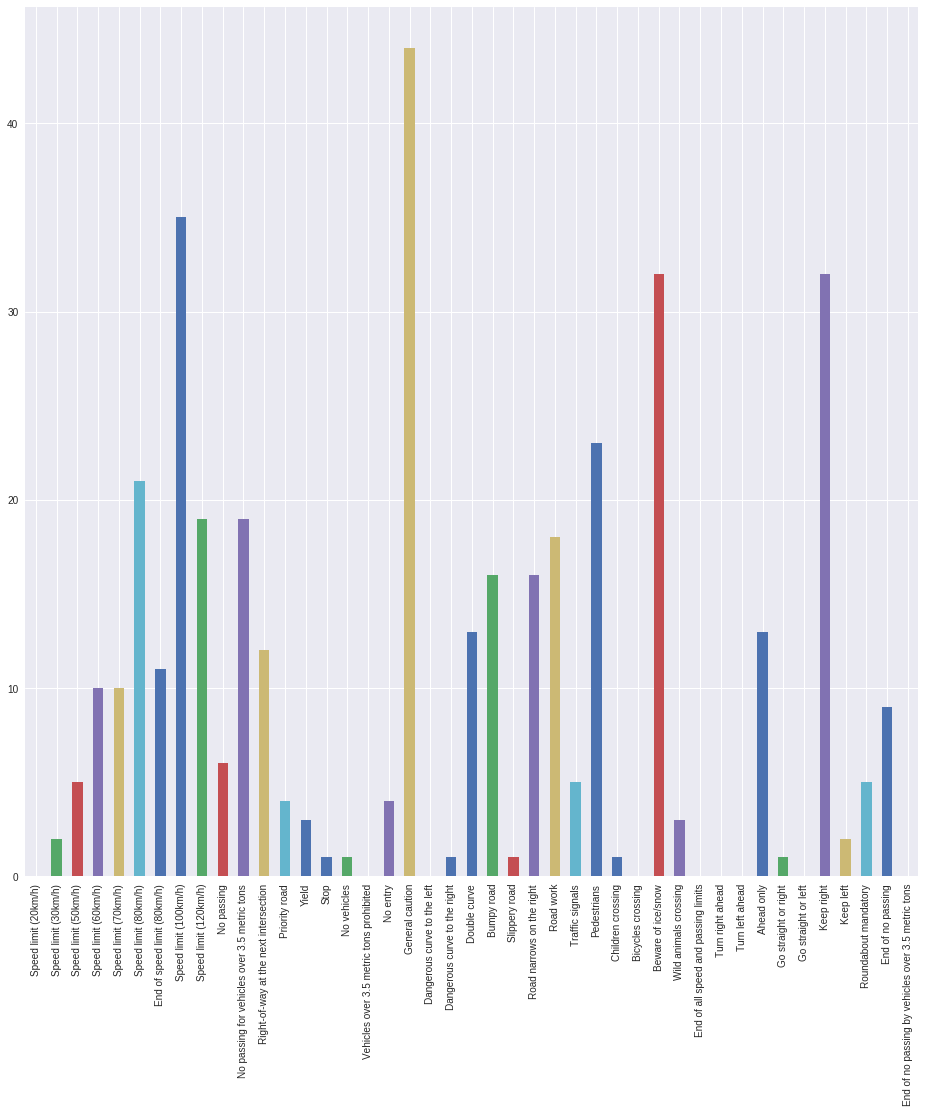

In [136]:
error_list = get_errors(X_test,y_test)
print(1-sum(error_list)/len(y_test)) # compare with the validation Accuracy
# classes_text = [sign_names[str(i)] for i in range(n_classes)]
errors_serial = pd.Series(error_list, index=classes_text)
errors_serial.plot(kind='bar',figsize=(16,16))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

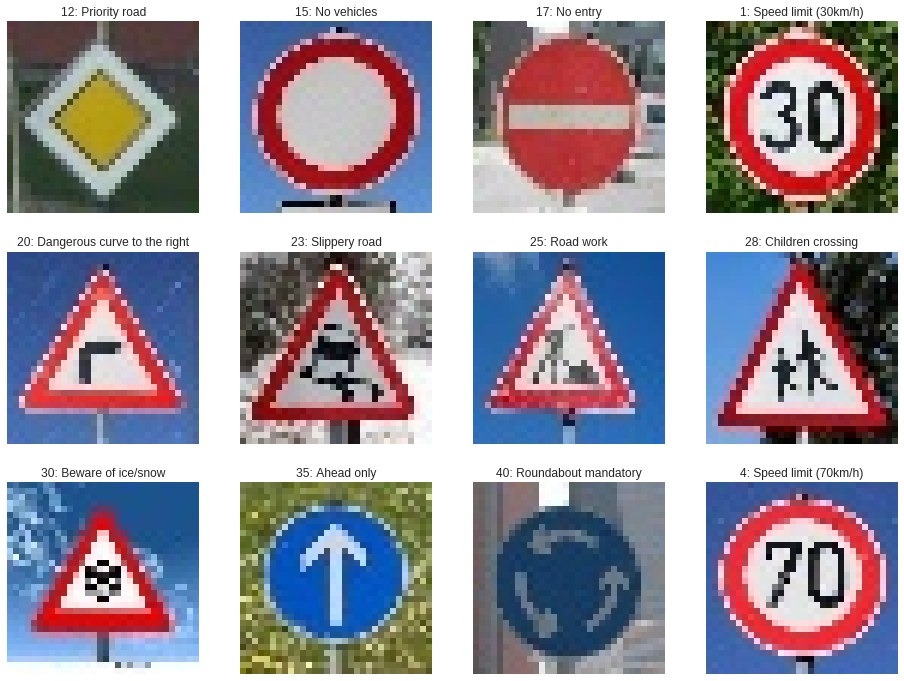

In [139]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

with open('images_web.p', mode='rb') as f:
    images_web = pickle.load(f)
    
X_web_images, y_web_images = images_web[0], images_web[1]
  
samples_fig = plt.figure(figsize=(16,12))
rows = 3
cols = 4
count = 0
gs = GridSpec(rows,cols)
for i in range(rows):
    for j in range(cols):
        ax = samples_fig.add_subplot(gs[i,j])
        ax.imshow(X_web_images[count])
        ax.set_title(str(y_web_images[count])+": "+sign_names[str(y_web_images[count])])
        ax.set_xticks([])
        ax.set_yticks([])
        count += 1

### Predict the Sign Type for Each Image

In [156]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))


    images_web_prob_top_k=sess.run(top_k, feed_dict={x: X_web_images, y: y_web_images, keep_prob_conv: 1.0, keep_prob_fc: 1.0})



INFO:tensorflow:Restoring parameters from ./lenet


### Analyze Performance

In [155]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_web_images, y_web_images, 128)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.917


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [0]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.


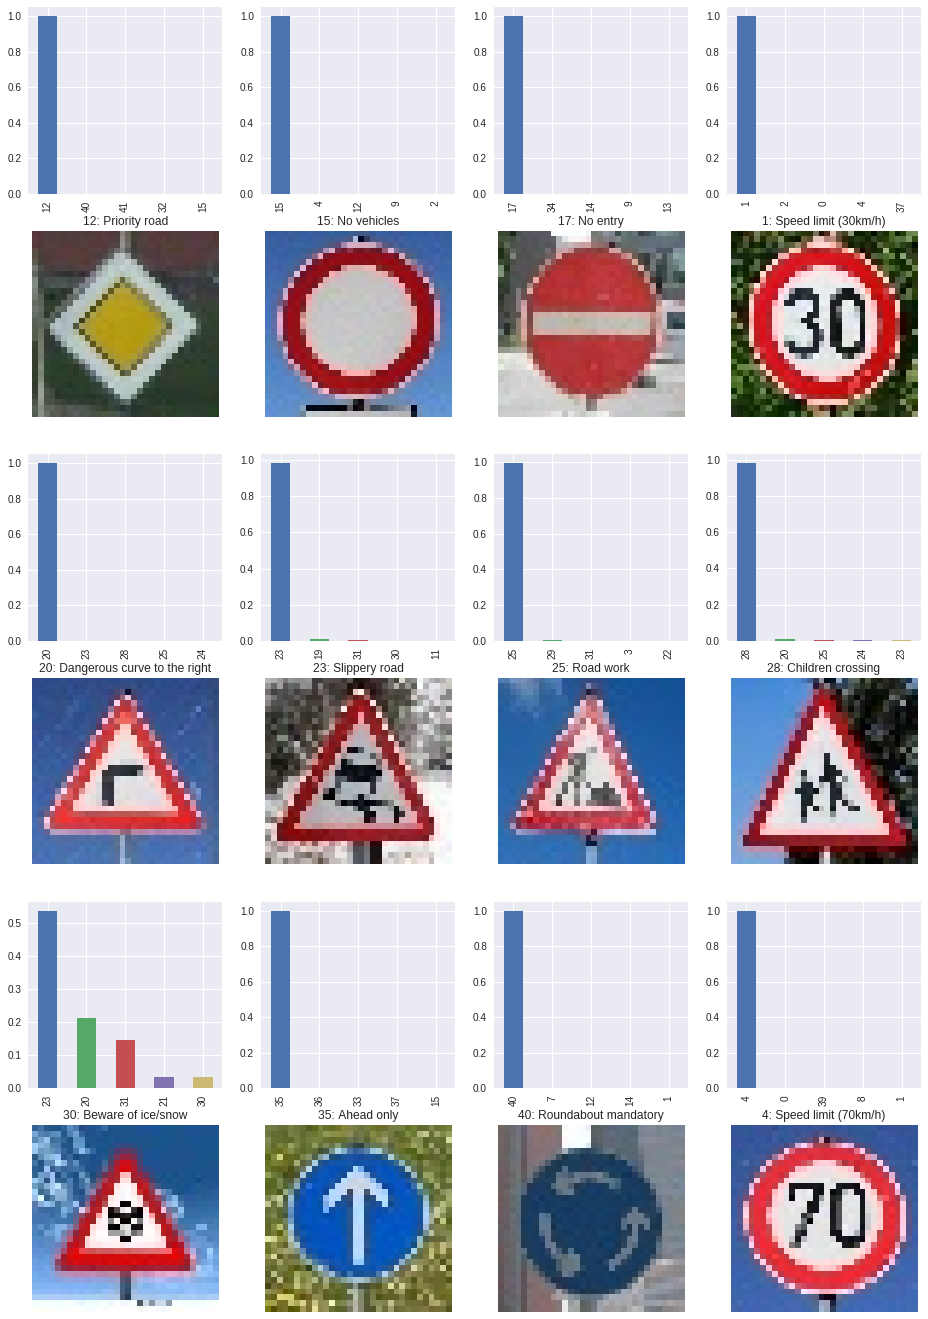

In [167]:
samples_fig = plt.figure(figsize=(16,24))
rows = 6
cols = 4
count_img = 0
count_plt = 0
gs = GridSpec(rows,cols)
for i in range(rows):
    for j in range(cols):
        ax = samples_fig.add_subplot(gs[i,j])
        if i % 2 == 0:
          image_prob = pd.Series(images_web_prob_top_k.values[count_plt], index=images_web_prob_top_k.indices[count_plt])
          image_prob.plot(kind='bar')
          count_plt += 1         
        else:
          ax.imshow(X_web_images[count_img])
          ax.set_title(str(y_web_images[count_img])+": "+sign_names[str(y_web_images[count_img])])
          count_img += 1
          ax.set_xticks([])
          ax.set_yticks([])          


[0.5373754  0.21381953 0.14468056 0.03476369 0.03231011]


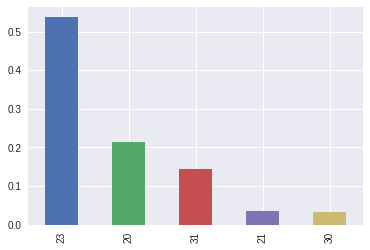

In [170]:
image_prob = pd.Series(images_web_prob_top_k.values[8], index=images_web_prob_top_k.indices[8])
image_prob.plot(kind='bar')
print(images_web_prob_top_k.values[8])

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [75]:
with tf.Session() as sess:
  
  saver.restore(sess, tf.train.latest_checkpoint('.'))
  
  weights = sess.run(tf.trainable_variables(scope=None))

INFO:tensorflow:Restoring parameters from ./lenet


In [85]:

weights[0][:,:,0,0]

array([[-0.14922641, -0.150447  ,  0.02772758,  0.14743504,  0.04199605],
       [ 0.03017291,  0.11039046,  0.04123593,  0.12101799, -0.02846357],
       [-0.07366499,  0.146609  , -0.12066813,  0.12541477,  0.10263864],
       [ 0.04948176,  0.01114621,  0.09381316,  0.04125559,  0.00961129],
       [-0.05773808,  0.08659964, -0.1738895 , -0.03544847, -0.02900996]],
      dtype=float32)

In [0]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [0]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry


# Here make sure to preprocess your image_input in a way your network expects
# with size, normalization, ect if needed
# image_input =
# Note: x should be the same name as your network's tensorflow data placeholder variable
# If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function



In [0]:
def outputFeatureMap(image_input, weights, activation_min=-1, activation_max=-1 ,plt_num=1, i=0):
    images_3c = tf.placeholder(tf.float32, (None, 32,32, 3))
    # Change RGB to Gray
    images_1c = tf.image.rgb_to_grayscale(images_3c)

    # normalize the data
    images_1c = tf.map_fn(lambda image: tf.image.per_image_standardization(image), images_1c)

    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x24.
    weight_c1 = weights[0]
    biases_c1 = weights[1]
    conv1 = tf.nn.conv2d(images_1c, weight_c1, strides=[1,1,1,1], padding='VALID')
    conv1 = tf.nn.bias_add(conv1, biases_c1)
    sess = tf.Session()
    activation = sess.run(conv1,feed_dict={images_3c : X_web_images})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[i,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[i,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[i,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[i,:,:, featuremap], interpolation="nearest", cmap="gray")

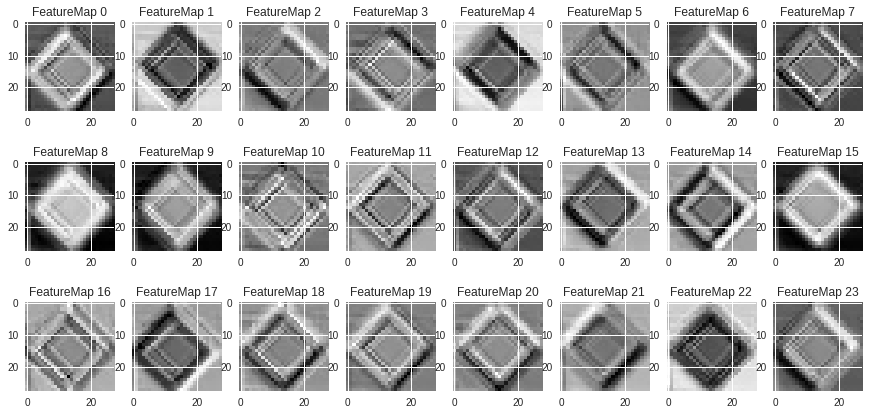

In [114]:
 outputFeatureMap(X_web_images, weights, activation_min=-1, activation_max=-1 ,plt_num=1, i=0)

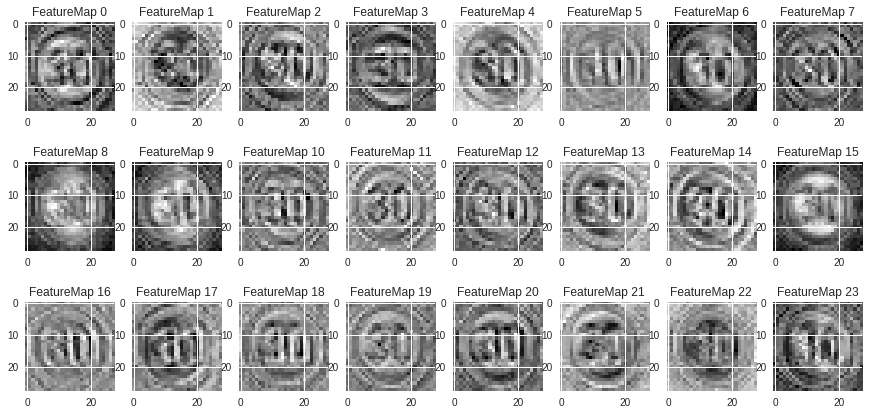

In [115]:
 outputFeatureMap(X_web_images, weights, activation_min=-1, activation_max=-1 ,plt_num=1, i=3)

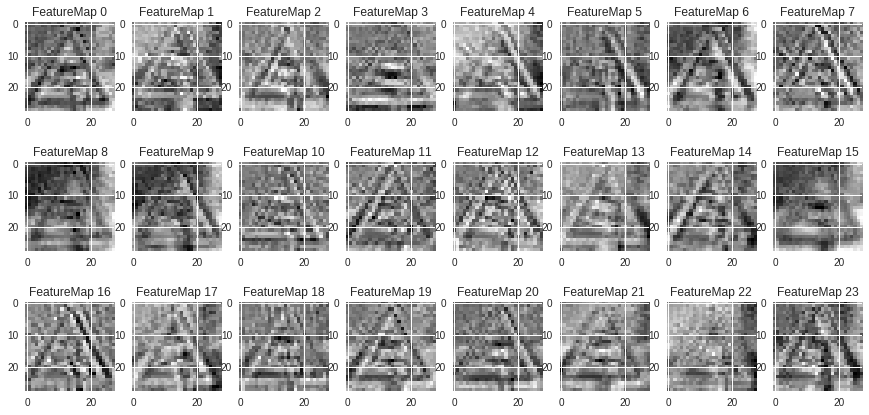

In [116]:
 outputFeatureMap(X_web_images, weights, activation_min=-1, activation_max=-1 ,plt_num=1, i=5)

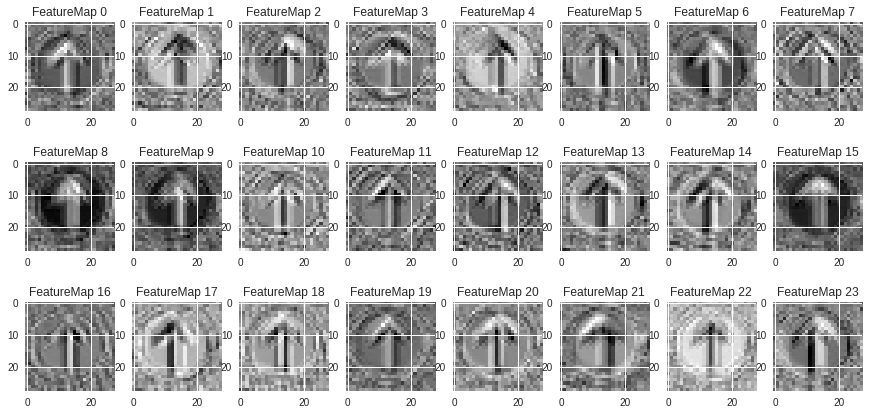

In [117]:
outputFeatureMap(X_web_images, weights, activation_min=-1, activation_max=-1 ,plt_num=1, i=9)

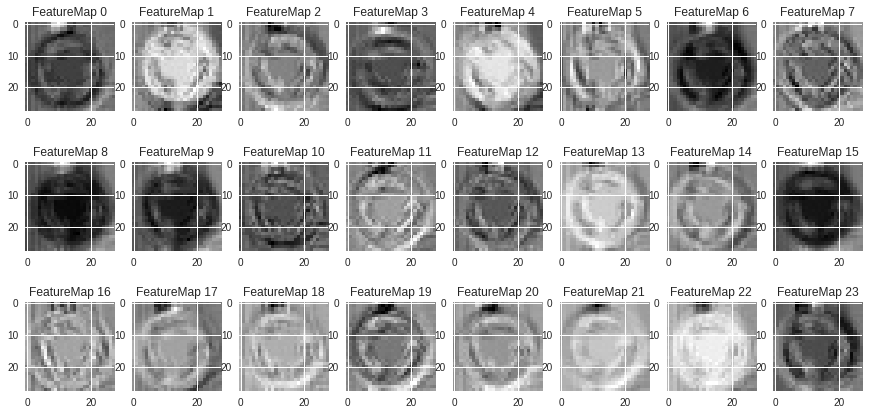

In [119]:
outputFeatureMap(X_web_images, weights, activation_min=-1, activation_max=-1 ,plt_num=1, i=10)